# Imports 

In [184]:
import pandas as pd
import numpy as np
import math
from sklearn import preprocessing
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

# Path

In [2]:
input_path = './data/project/bikes.data'

# Data preparation

## Load Data

In [3]:
df = pd.read_csv(input_path)

## Check Variables Type

Load the data from the file bikes.data. Check that the variables match the documentation above.


| Variable | Description |
| --- | --- |
| `ticket` | ticket type |
| `cost` | paid fee in euros |
| `month` | calendar month during which the trip was made |
| `location_from` | start location of the trip |
| `location_to` | end location of the trip |
| `duration` | travel time in seconds |
| `distance` | travel distance in meters |
| `assistance` | status of electric assistance (0 = disabled, 1 = enabled) |
| `energy_used` | energy consumed by the bike in watt-hours |
| `energy_collected` | energy collected by the bike in watt-hours |

### Ticket

`Ticket is a categorical variable and only has three distinct ticket types. Variable match with the documentation.`

Value Counts

In [4]:
df['ticket'].value_counts()

ticket
single     967
season     553
savonia    254
Name: count, dtype: int64

Describe

In [5]:
df['ticket'].describe()

count       1774
unique         3
top       single
freq         967
Name: ticket, dtype: object

### Cost

`Cost is a variable value ranging from 0 to 100 euros. Most of the values of this variable (paid fee) are near zero. Cost match with the documentation.`

Describe

In [5]:
df.cost.describe()

count    1774.000000
mean        0.491234
std         4.127344
min         0.000000
25%         0.000000
50%         0.050000
75%         0.550000
max       100.000000
Name: cost, dtype: float64

Type

In [6]:
df.cost.dtypes

dtype('float64')

Min and Max

In [7]:
df.cost.min(), df.cost.max()

(0.0, 100.0)

Maximum number of occurance Cost variable value

In [41]:
df['cost'].value_counts().reset_index().loc[0]

cost       0.0
count    800.0
Name: 0, dtype: float64

### Month

`Month variable values range from 4 to 10. The month is also an integer. The month matches the documentation.`

Type

In [11]:
df.month.dtype

dtype('int64')

Describe

In [42]:
df.month.describe()

count    1774.000000
mean        7.233371
std         1.720351
min         4.000000
25%         6.000000
50%         7.000000
75%         9.000000
max        10.000000
Name: month, dtype: float64

Value Counts

In [43]:
df.month.value_counts()

month
6     355
7     355
5     298
9     277
10    237
8     214
4      38
Name: count, dtype: int64

### Location From

`Location from variable dtype is an object, but further checking all variable values are string. Variable only has 10 distinct values. Variable match with the documentation.`

In [44]:
df.location_from.dtype

dtype('O')

check variable value type

In [45]:
for val in df.location_from.values:
    if not (type(val)==str):
        print(f"value type is differnt from string: {val}")

Describe

In [20]:
df.location_from.describe()

count     1774
unique      10
top       TORI
freq       418
Name: location_from, dtype: object

In [46]:
# df.location_from

Value Counts

In [ ]:
df.location_from.value_counts()

Unique Values

In [47]:
df.location_from.nunique()

10

### Location To

`Location to variable dtype is an object, but further checking all variable values are string. Variable only has 10 distinct values. Variable match with the documentation.`

In [48]:
df.location_to.dtype

dtype('O')

check veriable value type

In [49]:
for val in df.location_from.values:
    if not (type(val)==str):
        print(f"value type is differnt from string: {val}")

Describe

In [50]:
df.location_to.describe()

count     1774
unique      10
top       TORI
freq       400
Name: location_to, dtype: object

Value Counts

In [51]:
df.location_to.value_counts()

location_to
TORI              400
KAUPPAKATU        287
PUIJONLAAKSO      190
MICROTEKNIA       176
SATAMA            163
TASAVALLANKATU    156
NEULAMÄKI         155
KEILANKANTA       142
KYS                75
PIRTTI             30
Name: count, dtype: int64

Unique Values

In [53]:
df.location_to.nunique()

10

### Duration

`Variable duration satisfies time requirements in seconds, despite being slightly unusual. It matches the documentation.`

`Unusual Behaviour (maybe outliers): minmum duration is 2 second and maximum duration is around 7 hr `

Type

In [21]:
df.duration.dtype

dtype('float64')

Describe

In [54]:
df.duration.describe()

count     1774.000000
mean       671.323563
std       1141.708627
min          2.000000
25%        245.250000
50%        546.500000
75%        877.750000
max      25614.000000
Name: duration, dtype: float64

Minimum Time

In [23]:
df.duration.min()

2.0

Maximum time in hr

In [55]:
df.duration.max()/(60*60)

7.115

### Distance

`It is impossible for distance to be negative. The negativity may be due to direction or other error, but the variable does not match the documentation.`

`Unusual Behaviour: minimum distance is negative and maximum diatnace is around 20 km`

Type

In [57]:
df.distance.dtype

dtype('int64')

Describe

In [58]:
df.distance.describe()

count     1774.000000
mean      2460.067644
std       2352.529305
min      -3380.000000
25%        910.000000
50%       2030.000000
75%       3605.000000
max      20770.000000
Name: distance, dtype: float64

Minimum Distance

In [62]:
df.distance.min()

-3380

Maximum Distance in km

In [60]:
df.distance.max()/1000

20.77

Total number of negative values

In [64]:
(df.distance<0).sum()

39

### Assistance

`The assistance variable has only two unique integer values. Assistance match with the documentation.`

Type

In [65]:
df.assistance.dtype

dtype('int64')

Describe

In [67]:
df.assistance.describe()

count    1774.000000
mean        0.916009
std         0.277452
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: assistance, dtype: float64

Value Counts

In [68]:
df.assistance.value_counts()

assistance
1    1625
0     149
Name: count, dtype: int64

### Energy Used

`Energy used is a quantitative variable with a value range of 0 to 144. Energy used variable match with the documentation.`

Type

In [69]:
df.energy_used.dtype

dtype('float64')

Describe

In [70]:
df.energy_used.describe()

count    1774.000000
mean       17.399493
std        17.194463
min         0.000000
25%         1.425000
50%        14.350000
75%        26.900000
max       144.900000
Name: energy_used, dtype: float64

Minimum Value

In [71]:
df.energy_used.min()

0.0

Maximum Value

In [72]:
 df.energy_used.max()

144.9

### Energy Collected

`Energy collected variable is a quantitative variable with a value range of 0 to 56. Energy used variable match with the documentation.`

Type

In [73]:
df.energy_collected.dtype

dtype('float64')

Describe

In [74]:
df.energy_collected.describe()

count    1774.000000
mean        5.639290
std         6.379593
min         0.000000
25%         0.600000
50%         3.900000
75%         8.325000
max        56.400000
Name: energy_collected, dtype: float64

Minimum Value

In [75]:
df.energy_collected.min()

0.0

Maximum Value

In [76]:
 df.energy_collected.max()

56.4

## Variable Exploaration

Use both visualisations and numerical summaries to explore the variables. Filter out irrelevant records and process invalid values, if any. Explain why the records are irrelevant or the values invalid. Also explain how the modifications you made to the data fix the problems.

`I have explore numerial summaries in above section, Here I will more foucs on visual visualisations.`

### All Plot

`Plotted all possible plots with each other`

array([[<Axes: xlabel='cost', ylabel='cost'>,
        <Axes: xlabel='month', ylabel='cost'>,
        <Axes: xlabel='duration', ylabel='cost'>,
        <Axes: xlabel='distance', ylabel='cost'>,
        <Axes: xlabel='assistance', ylabel='cost'>,
        <Axes: xlabel='energy_used', ylabel='cost'>,
        <Axes: xlabel='energy_collected', ylabel='cost'>],
       [<Axes: xlabel='cost', ylabel='month'>,
        <Axes: xlabel='month', ylabel='month'>,
        <Axes: xlabel='duration', ylabel='month'>,
        <Axes: xlabel='distance', ylabel='month'>,
        <Axes: xlabel='assistance', ylabel='month'>,
        <Axes: xlabel='energy_used', ylabel='month'>,
        <Axes: xlabel='energy_collected', ylabel='month'>],
       [<Axes: xlabel='cost', ylabel='duration'>,
        <Axes: xlabel='month', ylabel='duration'>,
        <Axes: xlabel='duration', ylabel='duration'>,
        <Axes: xlabel='distance', ylabel='duration'>,
        <Axes: xlabel='assistance', ylabel='duration'>,
        <Axes:

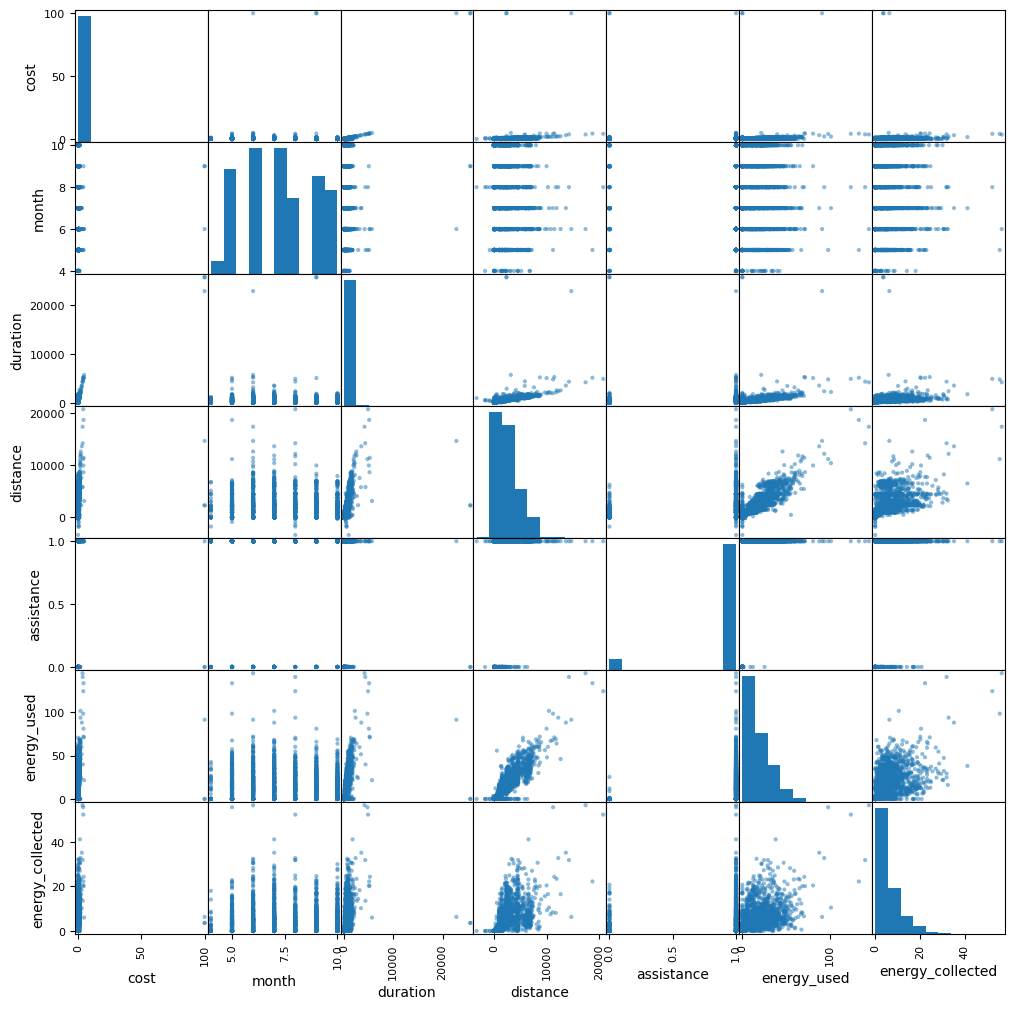

In [78]:
pd.plotting.scatter_matrix(df, figsize=(12,12))

### Check Nan values

`No NaN value exist in data`

In [81]:
df.isna().sum()

ticket              0
cost                0
month               0
location_from       0
location_to         0
duration            0
distance            0
assistance          0
energy_used         0
energy_collected    0
dtype: int64

### Distance 

`Problem: The distance value is negative, which is incorrect as distance is a scalar quantity and must always be positive.`

Discribe

In [42]:
df.distance.describe()

count     1774.000000
mean      2460.067644
std       2352.529305
min      -3380.000000
25%        910.000000
50%       2030.000000
75%       3605.000000
max      20770.000000
Name: distance, dtype: float64

Number of negative values

In [79]:
(df.distance<0).sum()

39

`Filter out all the negative value`

In [80]:
df.loc[df.distance<0]

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
23,single,0.15,5,TASAVALLANKATU,TASAVALLANKATU,138.0,-150,1,0.2,0.0
60,season,0.00,8,MICROTEKNIA,MICROTEKNIA,41.0,-20,1,0.0,0.0
62,single,0.10,8,KEILANKANTA,KEILANKANTA,73.0,-30,1,0.0,0.0
96,single,0.05,5,TORI,TORI,48.0,-10,1,0.0,0.0
125,savonia,0.00,10,KAUPPAKATU,KAUPPAKATU,48.0,-20,1,0.0,0.0
242,savonia,0.00,10,TORI,KAUPPAKATU,207.0,-180,1,3.3,0.0
284,single,0.15,4,KAUPPAKATU,KAUPPAKATU,178.0,-50,1,0.2,0.0
295,season,0.00,8,KAUPPAKATU,KAUPPAKATU,79.0,-60,1,0.0,0.0
318,single,0.45,8,KYS,PUIJONLAAKSO,480.0,-880,1,0.0,0.0
322,savonia,0.00,10,KYS,KYS,70.0,-10,1,0.0,0.0


`Modify: I think the negative sign appeared due to an error in the direction {for example distance(location to)-distance(loaction from) istead they have use distance(location from)-distance(location to)}. To resolve this, I will present all distances as positive numbers.`

In [83]:
df.distance = df.distance.abs()

Check the Change: number of negative values

In [85]:
(df.distance<0).sum()

0

### Electric Assistance

`Problem: If electric assistance is not utilized, the energy consumed must be equal to zero.`

Number of data with this issue

In [86]:
df.loc[(df['assistance']==0) & (df['energy_used']!=0.0)].shape

(4, 10)

`Filter out the problematic data`

In [87]:
df.loc[(df['assistance']==0) & (df['energy_used']!=0.0)]

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
231,single,0.10,7,TASAVALLANKATU,TASAVALLANKATU,61.0,1300,0,9.0,11.1
611,season,0.00,10,PIRTTI,PIRTTI,1795.0,1880,0,12.1,2.7
1372,savonia,0.00,10,TORI,TORI,8.0,190,0,1.5,0.6
1453,single,0.55,7,TORI,PUIJONLAAKSO,611.0,2590,0,25.4,3.3


`This error may be due to a faulty device because energy is being used. I will change assistance from 0 to 1.`

Values Count

In [90]:
df.assistance.value_counts()

assistance
1    1625
0     149
Name: count, dtype: int64

In [91]:
df.loc[(df['assistance'] == 0) & (df['energy_used'] != 0.0), 'assistance'] = 1

Check Data: count value of 0 change from 149 to 145, difference is 4

In [93]:
df.assistance.value_counts()

assistance
1    1629
0     145
Name: count, dtype: int64

# Data exploration

## 4.1

For each ticket type, calculate the number of trips made, the total distance travelled, the total time travelled and the total amount of fees paid. Examine your results and make comments about the customers.

### Number of trips 

`Number trip made per ticket type`

Count

In [102]:
df.ticket.value_counts()

ticket
single     967
season     553
savonia    254
Name: count, dtype: int64

Single share in total trip

In [105]:
967/(df.ticket.count())

0.5450958286358512

Plot

<Axes: xlabel='ticket'>

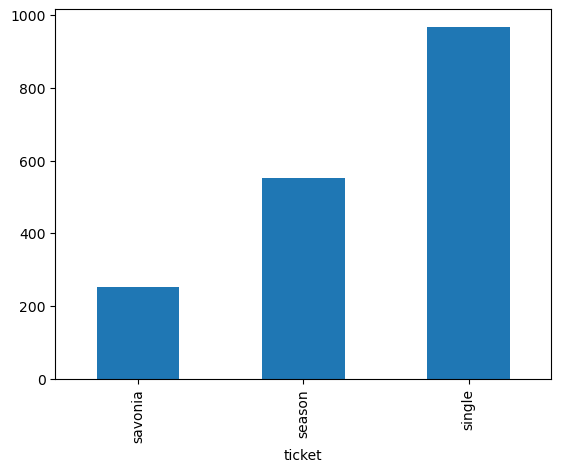

In [97]:
df.groupby('ticket')['ticket'].count().plot.bar()

### Total Distance travelled 

`Total distance travelled per ticket type`

Count

In [98]:
df.groupby('ticket')['distance'].sum()

ticket
savonia     499880
season     1315880
single     2574360
Name: distance, dtype: int64

Plot

<Axes: xlabel='ticket'>

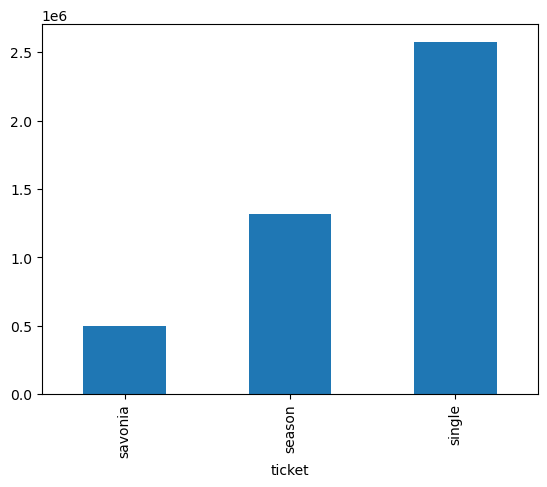

In [99]:
df.groupby('ticket')['distance'].sum().plot.bar()

### Duration

`Total time travelled per ticket type`

Count

In [100]:
df.groupby('ticket')['duration'].sum()

ticket
savonia    192624.0
season     325963.0
single     672341.0
Name: duration, dtype: float64

Plot

<Axes: xlabel='ticket'>

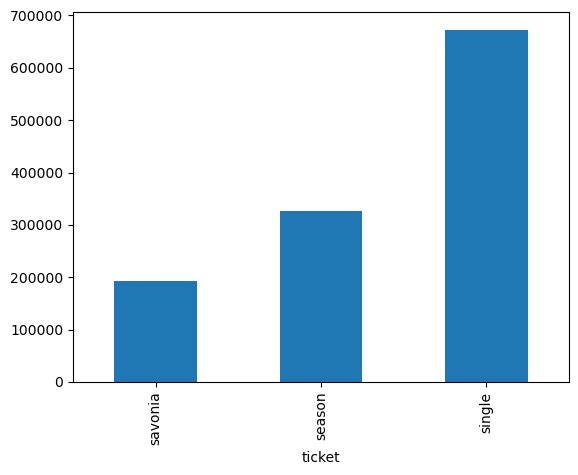

In [101]:
df.groupby('ticket')['duration'].sum().plot.bar()

### Fee Paid

`total fee paid per ticket type`

Count

In [57]:
df.groupby('ticket')['cost'].sum()

ticket
savonia    202.00
season       3.00
single     666.45
Name: cost, dtype: float64

Plot

<Axes: xlabel='ticket'>

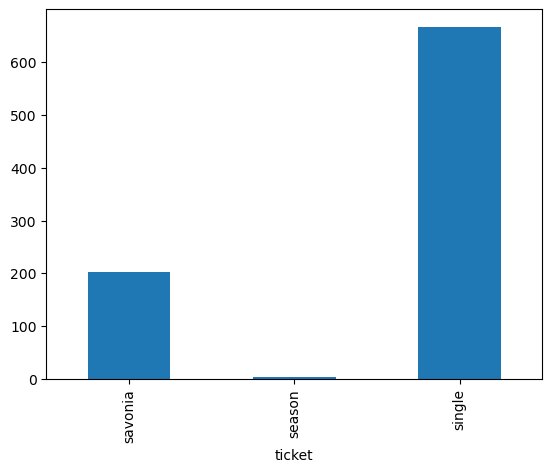

In [58]:
df.groupby('ticket')['cost'].sum().plot.bar()

### Comments about customer

Upon comparing the above data:

1. The two groups that consistently make the highest payments are "Single ticket type" and "Savonia ticket type." These groups tend to contribute the most substantial fees, while the "Season" category contributes the least revenue.

2. A noticeable correlation emerges when observing the number of trips, total distance traveled, and trip duration, they follow same trends. 

3. It becomes evident that the "Single ticket type" group is the most frequent user of the bike-sharing service (contributing 50% of tripm), which results in higher numbers for these metrics.

### Aditional Analysis

To gain a deeper understanding of our customers, I conducted additional analysis. Specifically, I calculated the average fee paid per trip for each ticket type. Instead of simply summing all the values, I computed the average trip cost for each ticket type, providing more insight into customer behavior.

`Fee Paid per Trip vs Ticket`

Identify any outliers in the fee paid data, as the presence of outliers can potentially skew our results in one direction. I have plotted bar plot.

`Clearly most of cost variable is below 50, only 3 are above 50`

[Text(0, 0, '1771'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '3')]

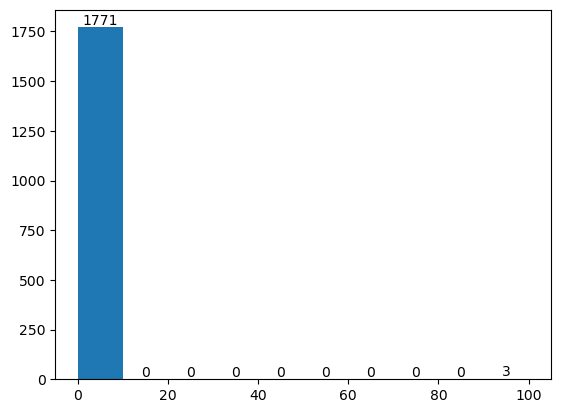

In [109]:
counts, edges, bars = plt.hist(df.cost, bins=10)

plt.bar_label(bars)

`Calculation of average trip cost for each ticket type for fee paid below 50.`

In [112]:
df_group_trip = df.loc[df.cost<50].groupby('ticket')['ticket'].count().reset_index(name='trip')
df_group_trip

,ticket,trip
0,savonia,252
1,season,553
2,single,966


In [113]:
df_group_fee = df.loc[df.cost<50].groupby('ticket')['cost'].sum().reset_index(name='total_fee_paid')
df_group_fee

,ticket,total_fee_paid
0,savonia,2.00
1,season,3.00
2,single,566.45


In [114]:
df_group_merge = pd.merge(df_group_trip, df_group_fee, on=['ticket'])
df_group_merge['fee_paid_per_trip'] = df_group_merge['total_fee_paid']/df_group_merge['trip']

In [115]:
df_group_merge

,ticket,trip,total_fee_paid,fee_paid_per_trip
0,savonia,252,2.00,0.007937
1,season,553,3.00,0.005425
2,single,966,566.45,0.586387


`Plot`

<Axes: xlabel='ticket'>

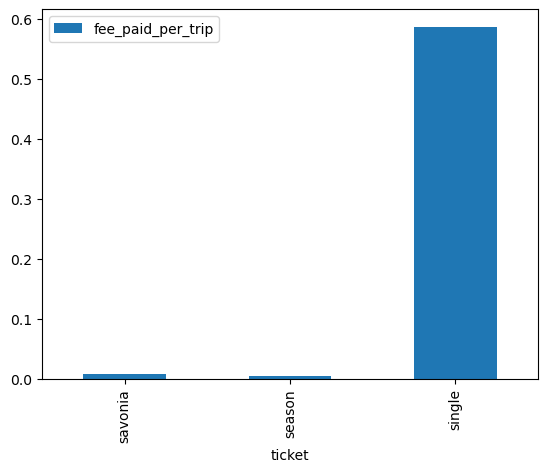

In [116]:
df_group_merge.plot.bar('ticket', 'fee_paid_per_trip')

`Observation`

It's evident that the single ticket type pays more money for each trip, making them the most valuable customer segment. Based on this insight, the company's advertising efforts should prioritize and target the single ticket type to maximize revenue.

## Monthly Rental Activity

For each ticket type, visualise the monthly rental activity in terms of the total distance travelled. Examine your results and make comments about the development of the rental activity over time.

`Plotted bar plot to better understand the distribution of distance travel per trip.`

[Text(0, 0, '910'),
 Text(0, 0, '488'),
 Text(0, 0, '237'),
 Text(0, 0, '110'),
 Text(0, 0, '14'),
 Text(0, 0, '8'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2')]

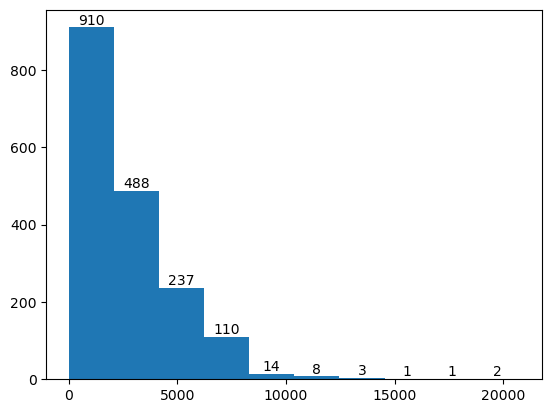

In [118]:
counts, edges, bars = plt.hist(df.distance, bins=10)

plt.bar_label(bars)

`Rental activity for all months per ticket type.`

<Axes: xlabel='ticket'>

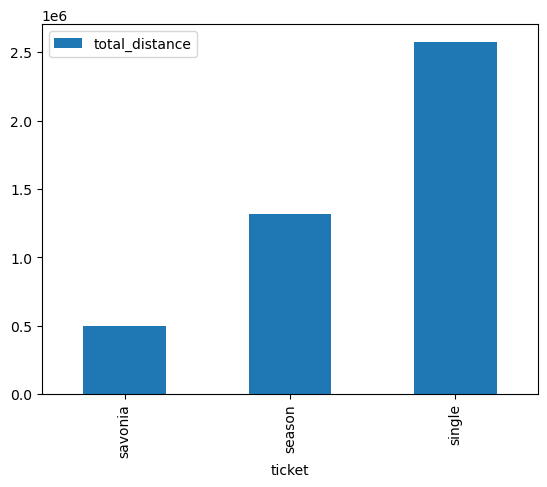

In [119]:
df.groupby('ticket')['distance'].sum().reset_index(name='total_distance').plot.bar('ticket', 'total_distance')

`Preparing data for monthly rental activity for every ticket type.`

In [120]:
df_rental_activity_over_time = df.groupby(['month', 'ticket'])['distance'].sum().reset_index(name='total_distance')

In [121]:
df_rental_activity_over_time

,month,ticket,total_distance
0,4,season,30680
1,4,single,36170
2,5,season,258550
3,5,single,495850
4,6,season,244780
5,6,single,710240
6,7,season,268150
7,7,single,594890
8,8,season,218270
9,8,single,362560


`Plot the monthly rental activity for each ticket type.`

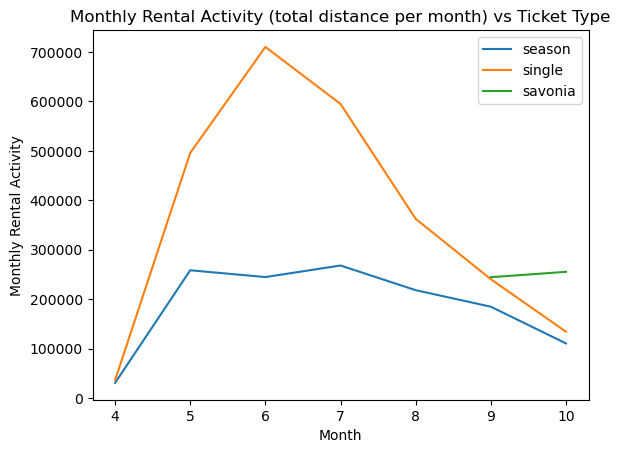

In [123]:
# create a line plot for each ticket type
for ticket_type in df_rental_activity_over_time['ticket'].unique():
    df_rental_activity_over_time_per_ticket = df_rental_activity_over_time[df_rental_activity_over_time['ticket'] == ticket_type]
    
    plt.plot(df_rental_activity_over_time_per_ticket['month'], 
             df_rental_activity_over_time_per_ticket['total_distance'], 
             label=ticket_type)

# set the title and axis labels
plt.title('Monthly Rental Activity (total distance per month) vs Ticket Type')
plt.xlabel('Month')
plt.ylabel('Monthly Rental Activity')

# add a legend and show the plot
plt.legend()
plt.show()

`comments about the development of the rental activity over time`

1. It's evident from the plot that there is a substantial increase in rental activity during the summer, while rental activity during the winter is almost negligible for all ticket types.

2. The peak rental activity occurs around the 6th and 7th months of the year, indicating a strong seasonal pattern in bike rentals.

3. Currently, the single ticket type exhibits the highest rental activity for most months.

4. Savonia is a relatively new ticket type compared to season and single, but it has gained popularity quickly since its introduction from last few months. However, it's challenging to make predictions about its future performance due to the limited data available for Savonia.

## Find Station Availability

Find the three stations that have the highest total deficit of bikes (i.e. the largest negative difference between the number of arrived bikes and the number of departured bikes) and the three stations that have the highest total surplus of bikes (i.e. the largest positive difference). Examine your results and make suggestions about how bikes could be relocated.

`Calculate total number of bike departure from location`

In [124]:
df_departured_count = df.location_from.value_counts().reset_index(name='no_of_bike_departured')
df_departured_count['location'] = df_departured_count['location_from']
df_departured_count

,location_from,no_of_bike_departured,location
0,TORI,418,TORI
1,KAUPPAKATU,237,KAUPPAKATU
2,SATAMA,200,SATAMA
3,MICROTEKNIA,182,MICROTEKNIA
4,PUIJONLAAKSO,161,PUIJONLAAKSO
5,NEULAMÄKI,157,NEULAMÄKI
6,KEILANKANTA,153,KEILANKANTA
7,TASAVALLANKATU,144,TASAVALLANKATU
8,KYS,94,KYS
9,PIRTTI,28,PIRTTI


`Calculate total number of bike arrived to location`

In [125]:
df_arrived_count = df.location_to.value_counts().reset_index(name='no_of_bike_arrived')
df_arrived_count['location'] = df_arrived_count['location_to']
df_arrived_count

,location_to,no_of_bike_arrived,location
0,TORI,400,TORI
1,KAUPPAKATU,287,KAUPPAKATU
2,PUIJONLAAKSO,190,PUIJONLAAKSO
3,MICROTEKNIA,176,MICROTEKNIA
4,SATAMA,163,SATAMA
5,TASAVALLANKATU,156,TASAVALLANKATU
6,NEULAMÄKI,155,NEULAMÄKI
7,KEILANKANTA,142,KEILANKANTA
8,KYS,75,KYS
9,PIRTTI,30,PIRTTI


`Merge these two data frame for futher calculation`

In [126]:
df_departured_arrived_count = pd.merge(df_departured_count, df_arrived_count, on='location', how='inner')
df_departured_arrived_count

,location_from,no_of_bike_departured,location,location_to,no_of_bike_arrived
0,TORI,418,TORI,TORI,400
1,KAUPPAKATU,237,KAUPPAKATU,KAUPPAKATU,287
2,SATAMA,200,SATAMA,SATAMA,163
3,MICROTEKNIA,182,MICROTEKNIA,MICROTEKNIA,176
4,PUIJONLAAKSO,161,PUIJONLAAKSO,PUIJONLAAKSO,190
5,NEULAMÄKI,157,NEULAMÄKI,NEULAMÄKI,155
6,KEILANKANTA,153,KEILANKANTA,KEILANKANTA,142
7,TASAVALLANKATU,144,TASAVALLANKATU,TASAVALLANKATU,156
8,KYS,94,KYS,KYS,75
9,PIRTTI,28,PIRTTI,PIRTTI,30


`Calculate net bike remain at each location`

In [127]:
df_departured_arrived_count['net_bike_remain'] = (df_departured_arrived_count['no_of_bike_arrived']-
                                                  df_departured_arrived_count['no_of_bike_departured'])

In [128]:
df_departured_arrived_count

,location_from,no_of_bike_departured,location,location_to,no_of_bike_arrived,net_bike_remain
0,TORI,418,TORI,TORI,400,-18
1,KAUPPAKATU,237,KAUPPAKATU,KAUPPAKATU,287,50
2,SATAMA,200,SATAMA,SATAMA,163,-37
3,MICROTEKNIA,182,MICROTEKNIA,MICROTEKNIA,176,-6
4,PUIJONLAAKSO,161,PUIJONLAAKSO,PUIJONLAAKSO,190,29
5,NEULAMÄKI,157,NEULAMÄKI,NEULAMÄKI,155,-2
6,KEILANKANTA,153,KEILANKANTA,KEILANKANTA,142,-11
7,TASAVALLANKATU,144,TASAVALLANKATU,TASAVALLANKATU,156,12
8,KYS,94,KYS,KYS,75,-19
9,PIRTTI,28,PIRTTI,PIRTTI,30,2


`Highest total deficit of bikes`

In [90]:
df_departured_arrived_count.nsmallest(3, 'net_bike_remain')

,location_from,no_of_bike_departured,location,location_to,no_of_bike_arrived,net_bike_remain
2,SATAMA,200,SATAMA,SATAMA,163,-37
8,KYS,94,KYS,KYS,75,-19
0,TORI,418,TORI,TORI,400,-18


`highest total surplus of bikes`

In [129]:
df_departured_arrived_count.nlargest(3, 'net_bike_remain')

,location_from,no_of_bike_departured,location,location_to,no_of_bike_arrived,net_bike_remain
1,KAUPPAKATU,237,KAUPPAKATU,KAUPPAKATU,287,50
4,PUIJONLAAKSO,161,PUIJONLAAKSO,PUIJONLAAKSO,190,29
7,TASAVALLANKATU,144,TASAVALLANKATU,TASAVALLANKATU,156,12


`other analysis`

Mean of column net_bike_remain is zero

In [131]:
df_departured_arrived_count.net_bike_remain.mean()

0.0

Total net bike surplus location

In [133]:
(df_departured_arrived_count.net_bike_remain>0).sum()

4

`KAUPPAKATU and PUIJONLAAKSO locations have more than 80% of total surplus supply`

In [139]:
df_departured_arrived_count.loc[df_departured_arrived_count.net_bike_remain>0]

,location_from,no_of_bike_departured,location,location_to,no_of_bike_arrived,net_bike_remain
1,KAUPPAKATU,237,KAUPPAKATU,KAUPPAKATU,287,50
4,PUIJONLAAKSO,161,PUIJONLAAKSO,PUIJONLAAKSO,190,29
7,TASAVALLANKATU,144,TASAVALLANKATU,TASAVALLANKATU,156,12
9,PIRTTI,28,PIRTTI,PIRTTI,30,2


In [140]:
df_departured_arrived_count.loc[df_departured_arrived_count.net_bike_remain>0].net_bike_remain.sum()

93

Percentage

In [148]:
((50+29)/93)*100

84.94623655913979

`SATAMA, KYS, TORI locations have combine deficit of around 80%`

In [147]:
(37+19+18)/93

0.7956989247311828

`plots`

Surplus Plot

<Axes: >

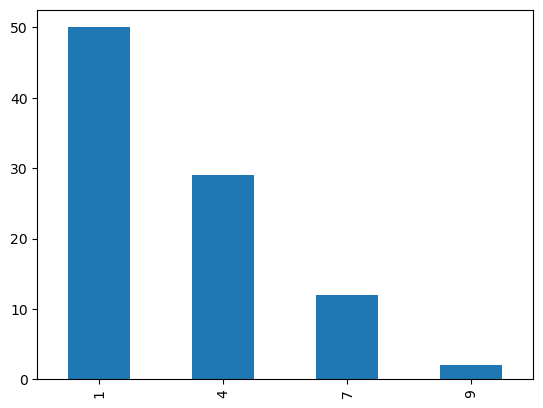

In [144]:
df_departured_arrived_count.loc[df_departured_arrived_count.net_bike_remain>0].net_bike_remain.plot.bar()

deficit plot

<Axes: >

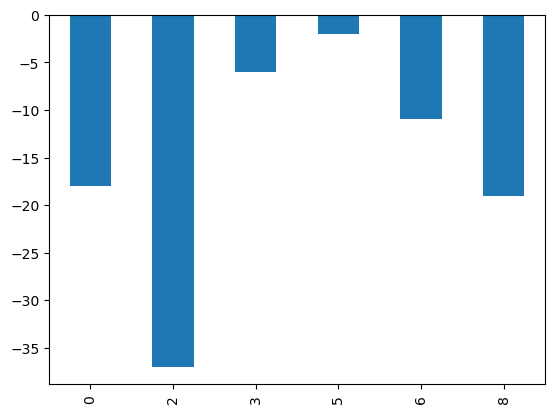

In [143]:
df_departured_arrived_count.loc[df_departured_arrived_count.net_bike_remain<0].net_bike_remain.plot.bar()

`Examine results and suggestions about bikes relocation`

It's essential to fine-tune the bike redistribution strategy to balance supply and demand. 
1. Among the locations, four show a net surplus in bike supply, with KAUPPAKATU and PUIJONLAAKSO having an impressive share of over 80%. Allocating additional resources to these locations could help redistribution of bikes.

2. While bike deficit locations are spread across the loactions, the top three, SATAMA, KYS, and TORI, collectively account for roughly 80% of the deficit. Prioritizing these stations for bike redistribution can address the most significant deficits efficiently.

3. Rather than concentrating efforts on nearly balanced stations, focusing on unbalanced stations can lead to cost savings and more effective management. Identifying and addressing the stations with the most significant imbalances can optimize the distribution of bikes and resources.

## Net Energy Gained

For each trip in the data set, calculate its net energy gain, which is defined as the difference between the energy collected and consumed during a trip. Visualise the distribution of this new variable. Make comments about how much battery levels tend to change during trips.

In [149]:
df.columns

Index(['ticket', 'cost', 'month', 'location_from', 'location_to', 'duration',
       'distance', 'assistance', 'energy_used', 'energy_collected'],
      dtype='object')

`Plot the net energy gained`

In [153]:
df_energy_gained = df
df_energy_gained['net_energy_gained'] = df['energy_collected'] - df['energy_used']

In [155]:
# df_energy_gained.plot.scatter(x='distance',y='energy_used', c='assistance', colormap='brg')

<Axes: xlabel='distance', ylabel='net_energy_gained'>

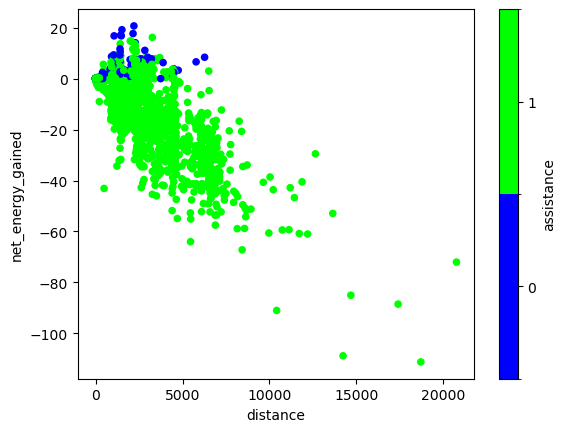

In [156]:
df_energy_gained['assistance'] = df_energy_gained['assistance'].astype('category')
df_energy_gained.plot.scatter(x='distance',y='net_energy_gained', c='assistance', colormap='brg')

`Plot the net energy trend for different assistance type`

In [157]:
df_energy_gained.loc[df_energy_gained.assistance==1.0].net_energy_gained.describe()

count    1629.000000
mean      -13.043094
std        14.882635
min      -111.200000
25%       -21.200000
50%       -10.300000
75%         0.000000
max        16.200000
Name: net_energy_gained, dtype: float64

In [158]:
df_energy_gained.loc[df_energy_gained.assistance==1.0].net_energy_gained.quantile(0.05)

-41.3

`When electric assistance used`

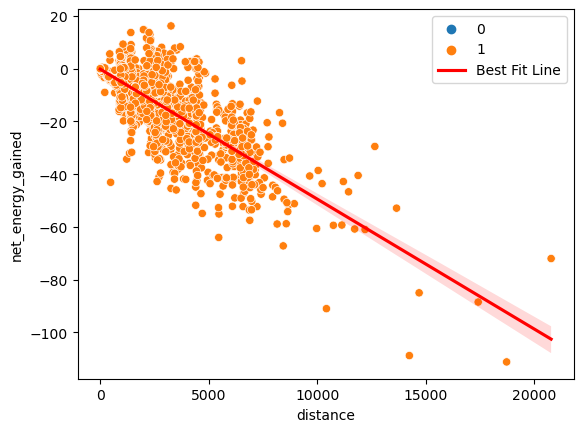

In [160]:
# Create a scatter plot
sns.scatterplot(x='distance',y='net_energy_gained', 
                data=df_energy_gained.loc[df_energy_gained.assistance==1.0], hue='assistance')

# Add a best fit line
sns.regplot(x='distance',y='net_energy_gained', 
            data=df_energy_gained.loc[df_energy_gained.assistance==1.0], 
            scatter=False, color='red', label='Best Fit Line')

# Add labels and a legend
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.show()

`When electric assistance is not used`

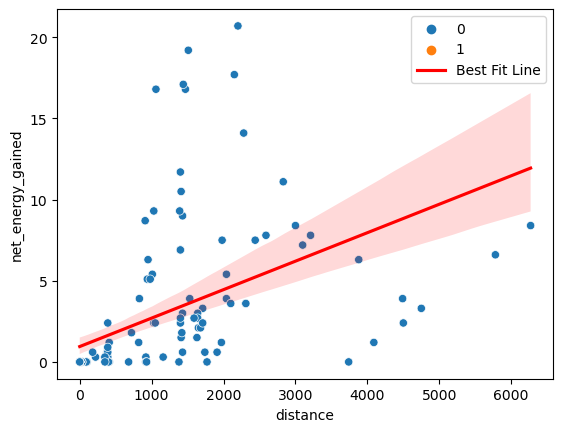

In [161]:
# Create a scatter plot
sns.scatterplot(x='distance',y='net_energy_gained', 
                data=df_energy_gained.loc[df_energy_gained.assistance==0.0], hue='assistance')

# Add a best fit line
sns.regplot(x='distance',y='net_energy_gained', 
            data=df_energy_gained.loc[df_energy_gained.assistance==0.0], 
            scatter=False, color='red', label='Best Fit Line')

# Add labels and a legend
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.show()

`comments about how much battery levels tend to change during trips`

1. The plot clearly shows that when electric assistance is set to 1, the net energy gained decreases proportionally with distance, while with assistance set to 0, the net energy gained increases proportionally with distance.

2. The best-fit lines for both assistance types exhibit a linear trend, indicating a consistent relationship between distance and net energy gained.

3. For longer trips exceeding 10,000 meters, around 100 watt-hours of net energy are required when assistance is set to 1.

4. When assistance is set to 1, 75% of the trips necessitate 21 watt-hours of net energy, illustrating a common energy consumption pattern for this setting.

# Hypothesis testing

## Travel Time

Is there statistical evidence to claim that the travel times tend to be shorter or longer for the single than for the season ticket type. Justify your design choices, interpret the results and use your discoveries to make conclusions about customers.

In [163]:
df.loc[df.ticket=='single'].duration.shape, df.loc[df.ticket=='season'].duration.shape

((967,), (553,))

`Duration variable data is not normally distributed for single and season ticket type`

shapiro test

In [164]:
(stats.shapiro(df.loc[df.ticket=='single'].duration), 
stats.shapiro(df.loc[df.ticket=='season'].duration))

(ShapiroResult(statistic=0.4340983033180237, pvalue=0.0),
 ShapiroResult(statistic=0.9431720972061157, pvalue=1.0356635254255009e-13))

`Given that the data is unpaired and not normally distributed, I have opted to use the Mann-Whitney U test for my analysis.`

In [165]:
stats.mannwhitneyu(df.loc[df.ticket=='single'].duration, df.loc[df.ticket=='season'].duration)

MannwhitneyuResult(statistic=276909.0, pvalue=0.24689478669078846)

the p-value is greater than 0.05, it suggests that there is not enough evidence to reject the null hypothesis, indicating that there is no significant difference between the two groups being compared.

`Despite the data in these groups not following a normal distribution, we can still utilize a t-test to compare their means. Sample size is big enough.`

In [166]:
stats.ttest_ind(df.loc[df.ticket=='single'].duration, df.loc[df.ticket=='season'].duration)

TtestResult(statistic=2.4207919328251104, pvalue=0.01560340486847036, df=1518.0)

In unpaired t-tests, a p-value of 0.015 indicates that there is a statistically significant difference between the means of the two groups being compared.

`Population Mean`

In [168]:
df.loc[df.ticket=='single'].duration.mean(), df.loc[df.ticket=='season'].duration.mean()

(695.2854188210962, 589.4448462929475)

`Observation`

Using a t-test, we found that the mean trip duration for single ticket type customers is significantly different from that of season ticket type customers. Specifically, single ticket type customers tend to have longer trips compared to season ticket type customers when we compare population mean. This suggests that the two customer groups may have varying travel behaviors, with single ticket customers opting for extended trips in comparison to their season ticket counterparts.

## Correlation between Energy and Distance

Is there statistical evidence to claim that the travel distance positively correlates with the average rate at which electricity is consumed during the trip? Justify your design choices, interpret the results and use your discoveries to make conclusions about customers.

`Data is not normally distributed`

Shapiro test

In [169]:
(stats.shapiro(df_energy_gained.distance), 
stats.shapiro(df_energy_gained.net_energy_gained))

(ShapiroResult(statistic=0.8667731285095215, pvalue=2.1215346652683756e-36),
 ShapiroResult(statistic=0.9004752039909363, pvalue=1.812164425620304e-32))

`Average rate at which energy is consumered is equal to negative of net energy gained`

In [179]:
df_energy_consumed = df
df_energy_consumed['net_energy_consumed'] = -df_energy_gained['net_energy_gained']

`Variables are not normal. So, I have choose spearman correlation`

In [180]:
df_energy_gained[['distance', 'net_energy_consumed']].corr(method='spearman')

,distance,net_energy_consumed
distance,1.000000,0.699613
net_energy_consumed,0.699613,1.000000


`Observation`

Distance and net energy consumed exhibit a positive correlation, indicating that as the bike travels a greater distance, it tends to consume more energy. In other words, longer trips result in higher energy consumption by the bike. This correlation underscores the relationship between the distance traveled and the energy expenditure, which can be valuable information for managing and maintaining the bike fleet effectively.

 ## Savonia Ticket Type

Is there statistical evidence to claim that the savonia ticket type differs from the others with respect to how often the electric assistance is used? Justify your design choices, interpret the results and use your discoveries to make conclusions about customers.

`Seperating Savonia ticket type from others`

In [181]:
savonia_assistance = df.loc[df.ticket=='savonia'].assistance
season_assistance = df.loc[df.ticket=='season'].assistance
single_assistance = df.loc[df.ticket=='single'].assistance
other_assistance = df.loc[df.ticket!='savonia'].assistance

In [194]:
df_assistance_hypothesis = df
df_assistance_hypothesis['new_ticket_cat'] = df.apply(lambda x: 'savonia' if x['ticket']=='savonia' else 'other', 
                                                          axis=1)

`Crosstab`

In [195]:
df.columns

Index(['ticket', 'cost', 'month', 'location_from', 'location_to', 'duration',
       'distance', 'assistance', 'energy_used', 'energy_collected',
       'net_energy_gained', 'net_energy_consumed', 'new_ticket_cat',
       'new_assistance_cat'],
      dtype='object')

`Comparing Savonia with others as combine group`

In [197]:
crosstab = pd.crosstab(df.new_ticket_cat, 
                       df.assistance)
crosstab

assistance,0,1
new_ticket_cat,,
other,109,1411
savonia,36,218


`I am opting for the Chi-squared test because electric assistance is a categorical variable.`

In [198]:
chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=13.299366616912527, pvalue=0.0002654957911914316, dof=1, expected_freq=array([[ 124.23900789, 1395.76099211],
       [  20.76099211,  233.23900789]]))

If p-value < 0.05: The variables are dependent, and there is a statistically significant relationship between them.

`Observation`

It appears that the Savonia ticket type is dependent on other ticket types (Single and Season) in terms of electric assistance usage. All ticket types seem to follow a similar pattern regarding electric assistance. This suggests that the choice of electric assistance is not strongly associated with the specific ticket type.

# Future Work

Point out one or more problems in the questions asked or the approaches used above. Propose changes to address the problem(s). Explain how the changes would improve the statistical analysis.

`Problem and Solution`

1. In Section 4.1, when we compare the fee paid per ticket, it can give a misleading impression of customer value. While some ticket types may have a high total paid fee, this approach does not show how valuable each trip is for different ticket types. To gain a more accurate understanding of customer value, it's essential to consider the average fee paid per trip for each ticket type, which provides insights into the significance of individual trips within each category. This way, we can better evaluate and compare the value of customers from different ticket types.

2. I have observed that the energy consumed per trip is correlated with the fee paid by customers. It's important to note that the total fee collected does not necessarily represent the actual profit. To gain a better understanding of how to manage the bike-sharing system and make real-life decisions, it's crucial to consider factors like the net profit.

# Rough Work: Analysis

In [64]:
df_group_merge['total_energy_used'] = df.groupby('ticket')['cost'].sum().reset_index(name='total_energy')['total_energy']

In [65]:
df_group_merge['energy_per_trip'] = df_group_merge['total_energy_used']/df_group_merge['trip'] 

`Energy per trip vs ticket`

<Axes: xlabel='ticket'>

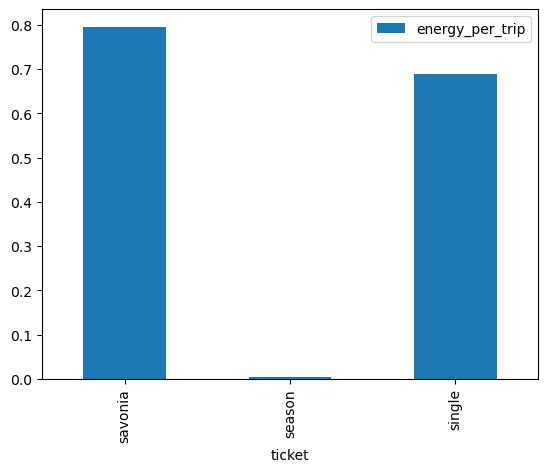

In [66]:
df_group_merge.plot.bar('ticket', 'energy_per_trip')

<Axes: xlabel='distance', ylabel='cost'>

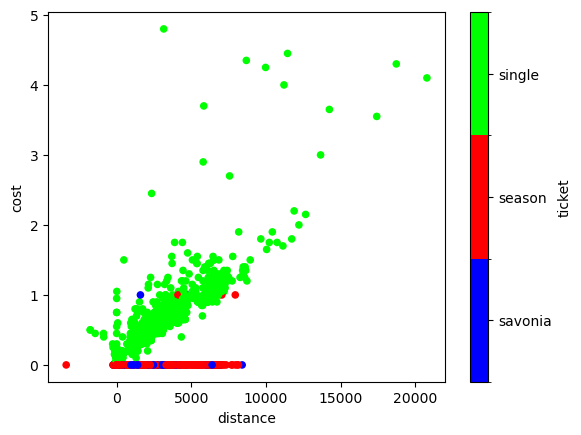

In [139]:
df['ticket'] = df['ticket'].astype('category')
df.loc[df['cost']<100].plot.scatter(x='distance',y='cost', c='ticket', colormap='brg')

<Axes: xlabel='ticket', ylabel='duration'>

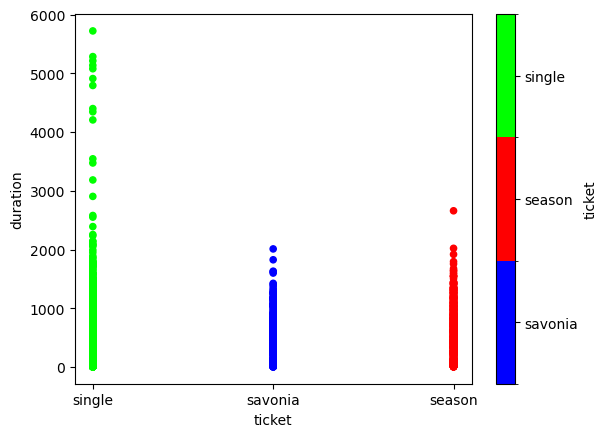

In [140]:
df.loc[df['cost']<100].plot.scatter(x='ticket',y='duration', c='ticket', colormap='brg')

<Axes: xlabel='cost', ylabel='net_energy_gained'>

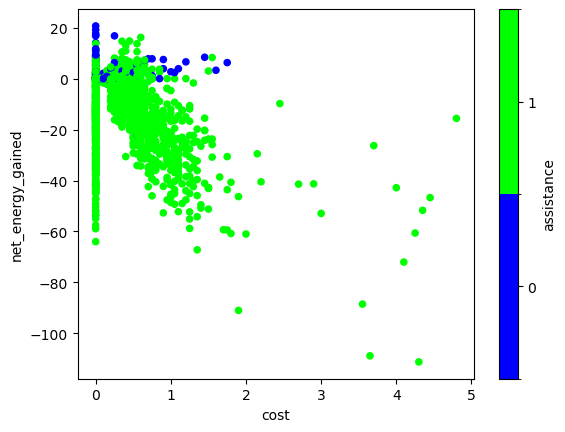

In [108]:
df_energy_gained.loc[df_energy_gained.cost<50].plot.scatter(x='cost',
                                                            y='net_energy_gained', 
                                                            c='assistance', 
                                                            colormap='brg')

In [44]:
df_distance_duration_scale = pd.DataFrame(preprocessing.normalize(df[['distance', 'duration']].values), 
                                          columns=['distance', 'duration'])

In [45]:
# df_distance_duration_scale

<Axes: xlabel='distance', ylabel='duration'>

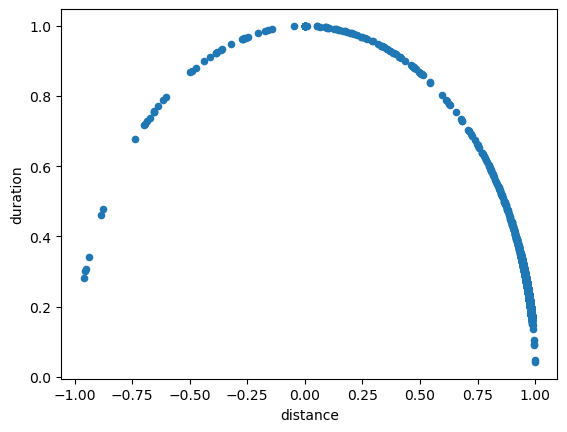

In [46]:
df_distance_duration_scale.plot.scatter(x='distance',y='duration')

<Axes: xlabel='distance', ylabel='duration'>

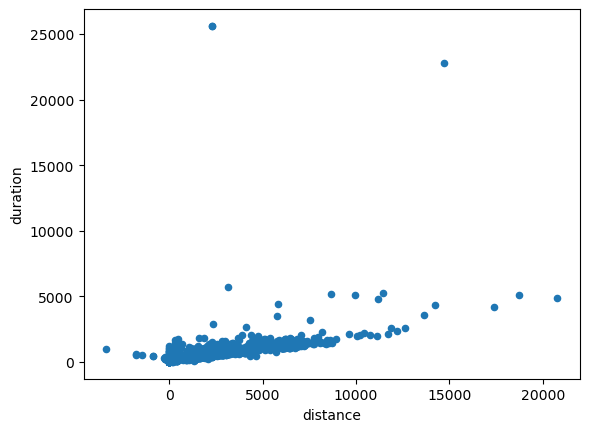

In [47]:
df.plot.scatter(x='distance',y='duration')

<Axes: xlabel='cost', ylabel='energy_used'>

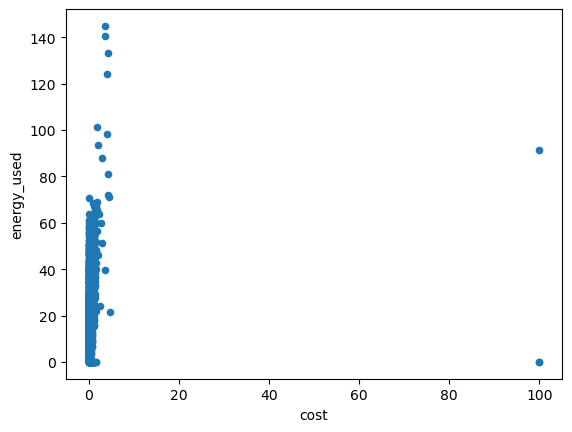

In [49]:
df.plot.scatter(x='cost',y='energy_used')

<Axes: xlabel='cost', ylabel='energy_used'>

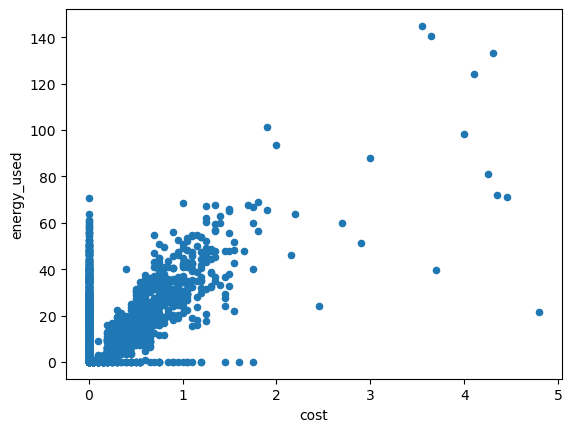

In [50]:
df.loc[df['cost']<50].plot.scatter(x='cost',y='energy_used')